# Aprendizaje automático
_Almudena Ruiz-Iniesta_ 
## Support Vector Machines
### Clasificación de especies de Iris

Hemos recogido muestras de Iris en base al tamaño de sus pétalos y sépalos
- Largo y ancho del pétalo en cm
- Largo y ancho del sépalo en cm

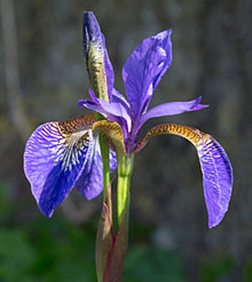

Ya tenemos clasificados unos datos recogidos previamente de un experto en el que ha clasificado tres especies: _Setosa, versicolor o virginica_

**Objetivo**

Construir un modelo de aprendizaje automático que aprenda de estos datos previos conocidos y podamos predecir la especie de los datos recogidos por nosotros.


#### Identificación del problema

Tenemos un problema de **aprendizaje supervisado**
- _Porque ya tenemos valores de las especies correctas._

Es un problema de clasificación.
- Cada una de las flores va a pertenecer a una de las tres posibles clases
- Las posibles salidas se denominan clases.

**Para unos datos de entrada la salida deseada es la especie a la que pertenece**


#### Primer paso: Exploración del dataset

In [1]:
# cargamos el conjunto de datos
from sklearn.datasets import load_iris

Asignamos el dataset en un objeto, es similar a un diccionario contiene keys y values

In [2]:
iris_dataset = load_iris()

In [3]:
print("Claves para el dataset:\n", iris_dataset.keys())

Claves para el dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


DESCR es una descripción del dataset.

In [4]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- `target_names` es un array de `String` que contiene las especies que queremos predecir.
- `features_names` es una lista de `String` que da una descripción de cada característica.

In [5]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


Los datos están contenidos en los campos target y data.
data contiene un NumPy array con la longitud de pétalo y sépalo. Las filas se corresponden con cada flor encontrada y las columnas con los valores

In [6]:
print("Tipo de los Datos:", type(iris_dataset['data']))

Tipo de los Datos: <class 'numpy.ndarray'>


In [7]:
print("Forma de los datos:", iris_dataset['data'].shape)

Forma de los datos: (150, 4)


In [8]:
print("Primeras filas de datos: ", iris_dataset['data'][:5])

Primeras filas de datos:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


target es un NumPy array que contiene las especies conocidas de cada flor, están codificadas con valores 0 a 2

In [9]:
print("Datos conocidos: ", iris_dataset['target'])

Datos conocidos:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print("Valores de especies: ", iris_dataset['target_names'])

Valores de especies:  ['setosa' 'versicolor' 'virginica']


**Es un ejemplo y no vamos a hacer un EDA exhaustivo, pero sería lo que habría que hacer**

**Queremos clasificar las especias usando SVM**

Vamos a observar los datos para analizar si serían linealmente separables (en apariencia).

In [11]:
import pandas as pd
import numpy as np

data1 = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])

In [12]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


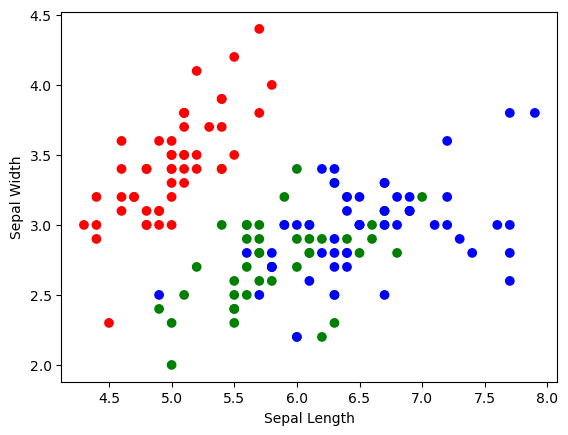

In [13]:
import matplotlib.pyplot as plt
import matplotlib

# Sepal length vs Sepal Width (Setosa vs Versicolor)
colors = ['red','green','blue']
label = data1['target']


plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], c=label, cmap=matplotlib.colors.ListedColormap(colors))


In [14]:
data1 = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
data1 = data1.loc[(data1['target'] ==1) | (data1['target'] ==2)]

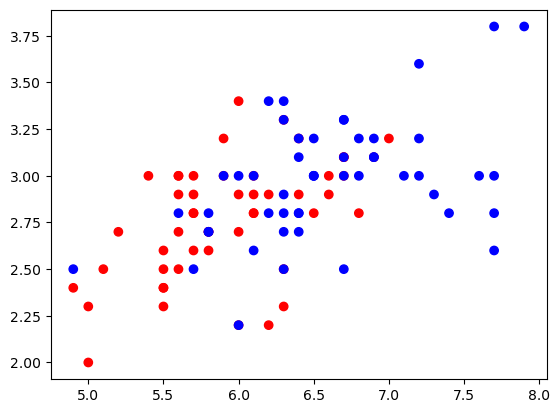

In [15]:
label = data1['target']

plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], c=label, cmap=matplotlib.colors.ListedColormap(colors))


#### Datos de entrenamiento y de test

Necesitamos evaluar el éxito de nuestro modelo para poderlo aplicar a futuros casos

No podemos utilizar los mismos datos para construir el modelo que para validarlo

Necesitamos nuevos datos que el modelo nunca haya visto pero para los que nosotros sí sabemos el resultado

_hold-out_: Particionamos el dataset inicial en datos de entrenamiento y en datos de test (75-25%)
scikit-learn contiene una función que mezcla el dataset y lo particiona


Habitualmente las particiones se llaman entrenamiento y pruebas

In [16]:
from sklearn.model_selection import train_test_split

X = data1.drop(columns = ['target']).copy()
y = data1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train, X_test, y_train, y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 98                 5.1               2.5                3.0               1.1
 56                 6.3               3.3                4.7               1.6
 149                5.9               3.0                5.1               1.8
 132                6.4               2.8                5.6               2.2
 126                6.2               2.8                4.8               1.8
 ..                 ...               ...                ...               ...
 146                6.3               2.5                5.0               1.9
 117                7.7               3.8                6.7               2.2
 114                5.8               2.8                5.1               2.4
 97                 6.2               2.9                4.3               1.3
 94                 5.6               2.7                4.2               1.3
 
 [75 rows x 4 columns],
      sepal length (cm)  s


Los para el algoritmo de SVM (Support Vector Machine). A continuación, se explica brevemente cada uno de ellos:

- C: El parámetro C controla el balance entre la maximización del margen y la minimización de los errores de clasificación. C es un factor de regularización que controla la penalización por clasificar incorrectamente puntos de datos de entrenamiento. Un valor más alto de C indica un enfoque más estricto en clasificar correctamente todos los puntos de entrenamiento, lo que puede conducir a un modelo más complejo y propenso al sobreajuste.

- Kernel: El parámetro kernel especifica el tipo de función de kernel utilizada para mapear los datos a un espacio de características de mayor dimensión. El kernel determina cómo se calcula la similitud entre los puntos de datos. Algunos de los kernels comunes son:
    - Lineal (linear): Utiliza el producto interno estándar para calcular la similitud.
    - RBF (Radial Basis Function): Utiliza una función de base radial para mapear los datos a un espacio de características de mayor dimensión.
    - Polinómico (polynomial): Utiliza un polinomio para mapear los datos a un espacio de características de mayor dimensión.

- Degree: Este parámetro se utiliza en el kernel polinómico y especifica el grado del polinomio a utilizar. Controla la complejidad del modelo y la flexibilidad en la forma de la frontera de decisión. Un grado más alto puede llevar a un modelo más complejo.

- Gamma: El parámetro gamma es relevante para los kernels RBF, polinómico y sigmoidal. Controla la influencia de un solo punto de datos y su alcance en la frontera de decisión. Un valor bajo de gamma significa un alcance más amplio y suaviza la frontera de decisión, mientras que un valor alto de gamma significa un alcance más estrecho y una frontera de decisión más compleja.

Es importante tener en cuenta que estos hiperparámetros interactúan entre sí y afectan el rendimiento y la capacidad de generalización del modelo SVM. La selección adecuada de los hiperparámetros es esencial para obtener buenos resultados. Puedes utilizar técnicas de búsqueda de hiperparámetros, como la validación cruzada, para encontrar la combinación óptima de valores para estos hiperparámetros en tu problema específico.

In [18]:
from sklearn.svm import SVC

# defatul: C=1, gamma=scale, kernel=rbf
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.92

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))


[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



El parámetro de regularización C establece un compromiso entre el error de entrenamiento y la complejidad del modelo.

C más pequeño ==> modelo sencillo, mayor error en el entrenamiento, suavidad en la frontera de decisión
C más grande ==> modelo complejo, poca suavidad de la frontera de decisión, riesgo de sobreajuste

In [20]:
# C = 10^-5--10^5
model_C = SVC(C=1000)
model_C.fit(X_train, y_train)
pred = model_C.predict(X_test)
print(confusion_matrix(y_test,pred))
#model_C.score(X_test, y_test)
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [21]:
# 2. Gamma

model_g = SVC(gamma=0.1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.92

In [22]:
pred = model_g.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [23]:
# 3. Kernel

model_linear_kernal = SVC(C=10, kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.92

In [24]:
pred = model_linear_kernal.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [25]:
# valores default de SVC
# f gamma='scale': 1 / (n_features * X.var())
model_all = SVC(C=10000, kernel='rbf', gamma='auto')
model_all.fit(X_train, y_train)
model_all.score(X_test, y_test)

0.92

In [26]:
pred = model_all.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



## Ejercicio:

Entrenar un clasificador para distinguir dígitos utilizando sklearn digits dataset, https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html (i.e. from sklearn.datasets import load_digits) y después,

Mida la precisión del modelo utilizando diferentes núcleos como rbf y linear.

Ajustar el modelo usando más parámetros de regularización y gamma y tratar de llegar a la puntuación más alta de precision

Utilizar el 80% de las muestras como tamaño de datos de entrenamiento